<a href="https://colab.research.google.com/github/VikramjitSinghRathee/RDKit-Cheminformatics/blob/master/RDKit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Install RDKit. Takes 2-3 minutes
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

--2020-05-17 20:01:37--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2020-05-17 20:01:37--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  81.12M  92.2MB/s    in 0.9s    

2020-05-17 20:01:38 (92.2 MB/s) - ‘Miniconda3-latest-Linu

In [0]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

print("Done")

Done



1.   SMILES Generator: http://www.cheminfo.org/flavor/malaria/Utilities/SMILES_generator___checker/index.html



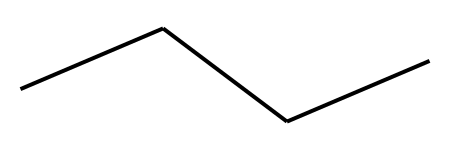

In [0]:
mol = Chem.MolFromSmiles('CCCC')
mol

In [0]:
smiles = Chem.MolToSmiles(mol)
smiles

'CCCC'

In [0]:
mw = Descriptors.MolWt(mol)
mw

58.123999999999995

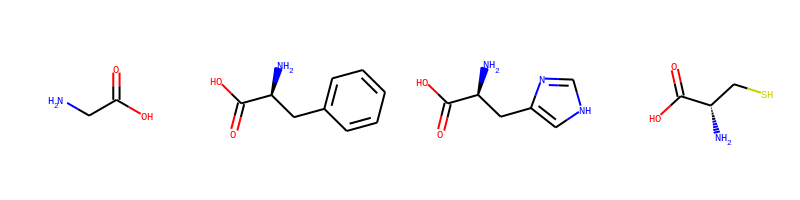

In [0]:
smiles_list = ['C(C(=O)O)N','N[C@@H](CC1=CC=CC=C1)C(O)=O','O=C([C@H](CC1=CNC=N1)N)O','C([C@@H](C(=O)O)N)S']
mol_list = []
for smiles in smiles_list:
  mol = Chem.MolFromSmiles(smiles)
  mol_list.append(mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=4)
img

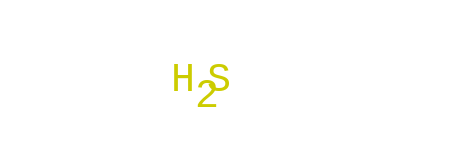

In [0]:
pattern = Chem.MolFromSmiles('S')
pattern

In [0]:
for mol in mol_list:
  print(mol.HasSubstructMatch(pattern))

False
False
False
True


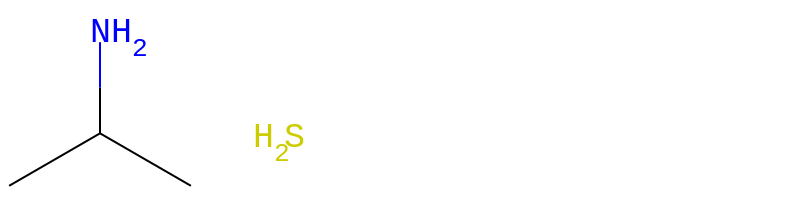

In [0]:
# Two patterns
pattern = [Chem.MolFromSmiles('CC(N)C'),Chem.MolFromSmiles('S')]
img = Draw.MolsToGridImage(pattern, molsPerRow=4)
img

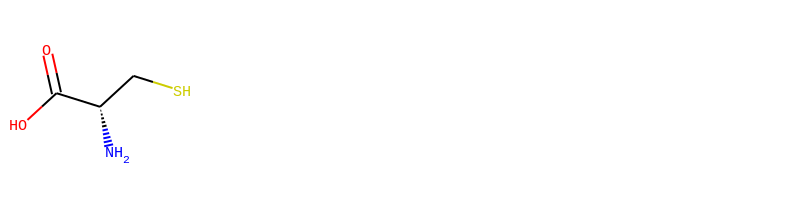

In [0]:
# Finding molecule that matches both patterns
pattern_yes_mol = []

for mol in mol_list:
  if mol.HasSubstructMatch(pattern[0]) and mol.HasSubstructMatch(pattern[1]):
    pattern_yes_mol.append(mol)

img = Draw.MolsToGridImage(pattern_yes_mol, molsPerRow=4)
img


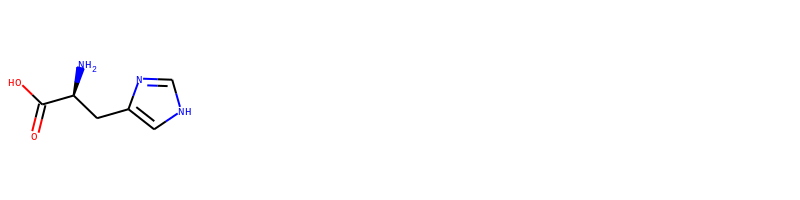

In [0]:
# Two patterns With SMARTS, Find if molecule has a ring

pattern = Chem.MolFromSmarts('[r5]')  # r5 is 5 membered ring

pattern_yes_mol = []
for mol in mol_list:
  if mol.HasSubstructMatch(pattern):
    pattern_yes_mol.append(mol)

img = Draw.MolsToGridImage(pattern_yes_mol, molsPerRow=4)
img
